In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()
train_n = x_train.shape[0]
val_n = x_val.shape[0]

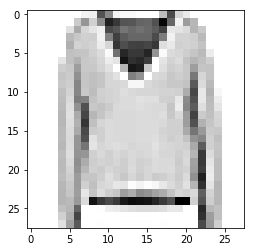

2


In [3]:
x_train = x_train.reshape(train_n,28,28,1).astype('float32') / 255.0
x_val = x_val.reshape(val_n,28,28,1).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

exampleindex = 394
digitimage = x_val[exampleindex,:,:,0]
digitlabel = np.argmax(y_val[exampleindex])

plt.imshow(digitimage, cmap=plt.cm.binary)
plt.show()
print(digitlabel)

In [4]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras import regularizers 

model = keras.models.Sequential()
model.add(Conv2D(filters=6, kernel_size=5, strides=1, use_bias=True, padding='valid', input_shape=(28, 28, 1,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Conv2D(filters=6, kernel_size=5, strides=1, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Dropout(0.1))
#model.add(Conv2D(filters=6, kernel_size=5, strides=1, padding='valid', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Flatten())
#model.add(Dense(400, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 6)           906       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 6)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 6)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               11640     
__________

In [5]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val,y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 305us/step - loss: 1.4052 - acc: 0.4830 - val_loss: 0.8696 - val_acc: 0.6877
Epoch 2/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.8508 - acc: 0.6823 - val_loss: 0.7127 - val_acc: 0.7336
Epoch 3/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.7427 - acc: 0.7201 - val_loss: 0.6415 - val_acc: 0.7526
Epoch 4/10
60000/60000 [==============================] - 23s 375us/step - loss: 0.6829 - acc: 0.7405 - val_loss: 0.6055 - val_acc: 0.7682
Epoch 5/10
60000/60000 [==============================] - 23s 383us/step - loss: 0.6453 - acc: 0.7552 - val_loss: 0.5843 - val_acc: 0.7724
Epoch 6/10
60000/60000 [==============================] - 23s 381us/step - loss: 0.6172 - acc: 0.7673 - val_loss: 0.5549 - val_acc: 0.7938
Epoch 7/10
60000/60000 [==============================] - 23s 379us/step - loss: 0.5920 - acc: 0.7774 - val_loss: 0.

In [8]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)


In [9]:
acc

[0.48296666666666666,
 0.6822666666666667,
 0.7200666666666666,
 0.7405,
 0.7551666666666667,
 0.7673,
 0.7773666666666667,
 0.785,
 0.7905333333333333,
 0.7968]

In [10]:
val_acc

[0.6877,
 0.7336,
 0.7526,
 0.7682,
 0.7724,
 0.7938,
 0.8025,
 0.8071,
 0.8132,
 0.8152]

In [11]:
loss

[1.405230226198832,
 0.8507778748194377,
 0.7427214100837708,
 0.6829229597409566,
 0.6453131737709046,
 0.6171853884379069,
 0.5920205654462178,
 0.5714225447654724,
 0.5604139785766602,
 0.5430615342458089]

In [12]:
val_loss

[0.8696135673522949,
 0.7127489464759826,
 0.6415113983154297,
 0.60552888879776,
 0.5842828736305237,
 0.554930960035324,
 0.5451646388530731,
 0.5214483503341675,
 0.5158377298355102,
 0.5162413303375244]

In [13]:
epochs

range(1, 11)

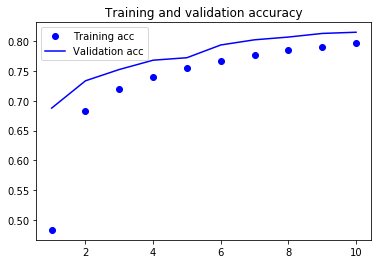

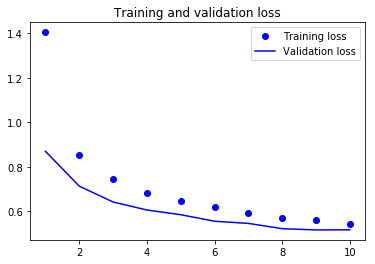

In [14]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()